In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
batch_size = 256
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2028)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                24348     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
Total params: 24,508
Trainable params: 24,508
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 1.5771 - acc: 0.4374 - val_loss: 0.8061 - val_acc: 0.8529
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.2610 - acc: 0.5490 - val_loss: 0.6425 - val_acc: 0.8816
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.1554 - acc: 0.5908 - val_loss: 0.5385 - val_acc: 0.8990
Epoch 4/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.0757 - acc: 0.6213 - val_loss: 0.4908 - val_acc: 0.9074
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.0423 - acc: 0.6343 - val_loss: 0.4453 - val_acc: 0.9148
Epoch 6/20
60000/60000 [==============================] - 1s 16us/step - loss: 1.0045 - acc: 0.6479 - val_loss: 0.4019 - val_acc: 0.9189
Epoch 7/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.9820 - acc: 0.6570 - val_loss: 0.3809 - val_acc

In [10]:
get_all_layer_outputs = K.function([model.layers[0].input],
                                  [l.output for l in model.layers[1:]])

In [11]:
layer_output = get_all_layer_outputs([x_test])

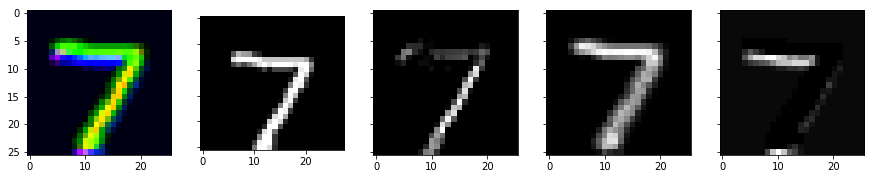

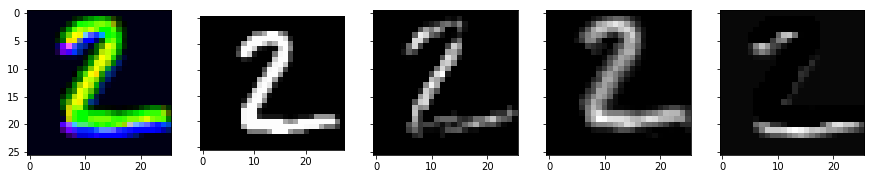

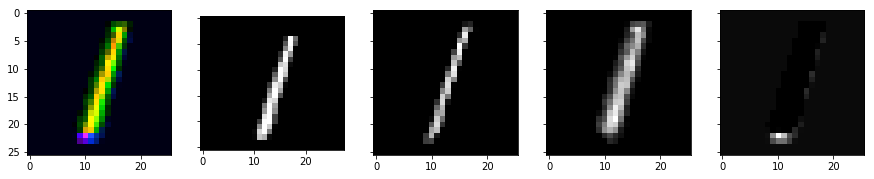

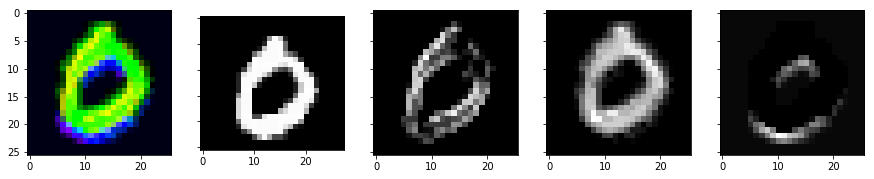

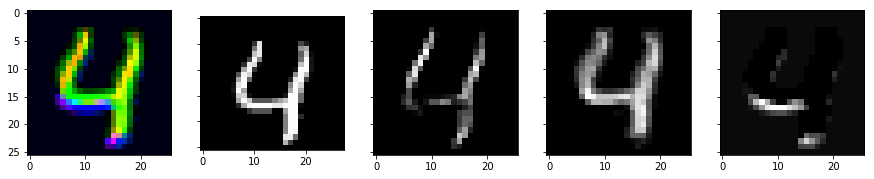

In [12]:
for i in range(5):
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True,figsize=(15,15))
    ax1.imshow(layer_output[0][i])
    ax2.imshow(x_test[i][:,:,0], cmap='gray')
    ax3.imshow(layer_output[0][i][:,:,0], cmap='gray')
    ax4.imshow(layer_output[0][i][:,:,1], cmap='gray')
    ax5.imshow(layer_output[0][i][:,:,2], cmap='gray')
    plt.show()